In [ ]:
#!/usr/bin/env python
## -*- coding: utf-8 -*-
__author__ = ["Ing. Alberto Lepe de los Angeles"]
__credits__ = ["Ing. Alberto Lepe de los Angeles"]
__license__ = "MIT"
__version__ = "0.0.1"
__maintainer__ = ["Ing. Alberto Lepe de los Angeles"]
__email__ = "alberto.lepe@edu.uag.mx"
__status__ = "Development"

#Implementación de una red MLP pra predecir el puntaje de una diana

> Modelo que predice la puntuación respecto a su posición de sus coordenadas. Obteniendo una precisión de 71%. Se observa en la matriz de confusión una línea diagonal que indica la cantidad de flechas que hizo la predicción correcta de la flecha, teniendo como falsos positivos y falsos negativos valores muy cercanos a la diagonal.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/renders_2.zip ./
!unzip renders_2.zip

In [ ]:
from platform import python_version
print("python version : "+ python_version())

python version : 3.7.10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pandas as pd
import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.optimizers import Adam
from sklearn import metrics
import seaborn as sns

In [ ]:
origen_size = (672,672)
target_size = (224,224)

dir_train = 'renders_2/1_train_672/'
csv_train = '/content/renders_2/1_train_672.csv'

dir_test = 'renders_2/1_test_672/'
csv_test = '/content/renders_2/1_test_672.csv'

In [ ]:
df1 = pd.read_csv(csv_train)
df2 = pd.read_csv(csv_test)

In [ ]:
data = pd.concat([df1, df2], ignore_index=True, sort=False)
data.head()

,filename,n_flchs,f1,f1p,f1x,f1y
0,0_Camera.001_N1NP_6P.jpg,1,Flecha.006_morada.001,6,212,444
1,1_Camera.000_N1NP_2P.jpg,1,Flecha.003_amarilla,2,133,544
2,2_Camera.001_N1NP_1P.jpg,1,Flecha.003_amarilla,1,150,85
3,3_Camera.003_N1NP_8P.jpg,1,Flecha.001_verde,8,300,377
4,4_Camera.003_N1NP_4P.jpg,1,Flecha.001_verde,4,154,426


In [ ]:
data.describe()

,n_flchs,f1p,f1x,f1y
count,6144.0,6144.000000,6144.000000,6144.000000
mean,1.0,5.499512,336.976562,333.962402
std,0.0,2.872458,129.810644,129.797476
min,1.0,1.000000,14.000000,6.000000
25%,1.0,3.000000,257.000000,252.000000
50%,1.0,5.000000,337.000000,337.000000
75%,1.0,8.000000,420.000000,417.000000
max,1.0,10.000000,657.000000,657.000000


In [ ]:
Y = np.asanyarray(data[['f1p']])
X = np.asanyarray(data.drop(columns=['filename','n_flchs','f1','f1p']))

print(X.shape)
print(Y.shape)

xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2,random_state=0)

step_size_train = len(xtrain) // 64
print(step_size_train)

print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

(6144, 2)
(6144, 1)
76
(4915, 2)
(4915, 1)
(1229, 2)
(1229, 1)


In [ ]:
X = StandardScaler().fit_transform(X)
Y = StandardScaler().fit_transform(Y)

scalerX = StandardScaler().fit(xtrain)
scalerY = StandardScaler().fit(ytrain)

x_train = scalerX.transform(xtrain)
y_train = scalerY.transform(ytrain)

x_test = scalerX.transform(xtest)
y_test = scalerY.transform(ytest)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[2]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1,activation='linear')
  ])
  model.compile(optimizer=Adam(), loss = 'mse', metrics = ['mae', 'mse'])
  return model
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               1536      
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 527,361
Trainable params: 527,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, ytrain, epochs=200, steps_per_epoch=step_size_train, validation_split = 0.2, verbose=1)
#history = model.fit(xtrain, y_train, epochs=100, steps_per_epoch=32, validation_split = 0.2, verbose=1)
#history = model.fit(x_train, y_train, epochs=100, validation_split = 0.2, verbose=1)
#history = model.fit(xtrain, ytrain, epochs=100, steps_per_epoch=step_size_train, validation_split = 0.2, verbose=1)

Epoch 1/200
76/76 [==============================] - 2s 15ms/step - loss: 21.3694 - mae: 3.7159 - mse: 21.3694 - val_loss: 0.3307 - val_mae: 0.4446 - val_mse: 0.3307
Epoch 2/200
76/76 [==============================] - 1s 11ms/step - loss: 0.2641 - mae: 0.4172 - mse: 0.2641 - val_loss: 0.2611 - val_mae: 0.3979 - val_mse: 0.2611
Epoch 3/200
76/76 [==============================] - 1s 12ms/step - loss: 0.2277 - mae: 0.3834 - mse: 0.2277 - val_loss: 0.2390 - val_mae: 0.3913 - val_mse: 0.2390
Epoch 4/200
76/76 [==============================] - 1s 11ms/step - loss: 0.2681 - mae: 0.4180 - mse: 0.2681 - val_loss: 0.1911 - val_mae: 0.3464 - val_mse: 0.1911
Epoch 5/200
76/76 [==============================] - 1s 13ms/step - loss: 0.2216 - mae: 0.3781 - mse: 0.2216 - val_loss: 0.2412 - val_mae: 0.3787 - val_mse: 0.2412
Epoch 6/200
76/76 [==============================] - 1s 12ms/step - loss: 0.2466 - mae: 0.3974 - mse: 0.2466 - val_loss: 0.1882 - val_mae: 0.3452 - val_mse: 0.1882
Epoch 7/200
76

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Puntos]')
  plt.plot(hist['epoch'], hist['mae'], label='Train MAE Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Puntos]')
  plt.plot(hist['epoch'], hist['mse'], label='Train MSE Error')
  plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()

plot_history(history)

In [ ]:
model.evaluate(x_train,ytrain)

154/154 [==============================] - 0s 2ms/step - loss: 0.1963 - mae: 0.3541 - mse: 0.1963


[0.1963009089231491, 0.3541359603404999, 0.1963009089231491]

In [ ]:
model.evaluate(x_test,ytest)

39/39 [==============================] - 0s 2ms/step - loss: 0.1955 - mae: 0.3574 - mse: 0.1955


[0.195537269115448, 0.3573896288871765, 0.195537269115448]

In [ ]:
#predeciccion de todos los valores del modelo para TEST y TRAIN

#Y_pred_train = model.predict(xtrain, step_size_train)
#Y_pred_test = model.predict(xtest, step_size_train)

Y_pred_train = model.predict(x_train, step_size_train)
Y_pred_test = model.predict(x_test, step_size_train)

In [ ]:
# Escalamiento inverso de los valores X & Y

xtrain_inv = scalerX.inverse_transform(x_train)
ytrain_inv = scalerY.inverse_transform(y_train)

xtest_inv = scalerX.inverse_transform(x_test)
ytest_inv = scalerY.inverse_transform(y_test)


In [ ]:
#Correr solo en caso de escalar los valores de X o Y
#Y_pred_train = scalerY.inverse_transform(Y_pred_train)
#Y_pred_test = scalerY.inverse_transform(Y_pred_test)

In [ ]:
#Ejemplo de predicciones solo TEST

sample = np.random.randint(len(xtest))
print(f"Pixeles   : {xtest[sample]}")
print(f"Verdadero : {ytest[sample]}")
print(f"Prediccion: {Y_pred_test[sample]}")

Pixeles   : [319 326]
Verdadero : [9]
Prediccion: [9.649967]


In [ ]:
df1 = pd.DataFrame(xtest, columns = ['x','y'])
df2 = pd.DataFrame(ytest.astype(int), columns = ['true_val'])
#df3 = pd.DataFrame(ypred_test, columns = ['pred_float'])
df3 = pd.DataFrame(Y_pred_test, columns = ['pred_float'])

#df = pd.concat([df1, df2, df3], ignore_index=False, sort=False)
df = pd.concat([df1, df2, df3], axis=1, join="inner")

#Actualizar valores > 9.5 a 10 y valored <= 0 a 1
df['pred_float'] = np.where(df['pred_float'] > 9.5, 10.0, df['pred_float'])
df['pred_float'] = np.where(df['pred_float'] <= 0, 1, df['pred_float'])

df.head()

,x,y,true_val,pred_float
0,490,54,1,1.027129
1,233,368,7,7.049477
2,551,384,4,3.425730
3,471,194,4,4.294769
4,110,493,2,1.639961


In [ ]:
pred_round = np.asanyarray(round(df["pred_float"])).astype(int)
pred_int = np.asanyarray(df["pred_float"].astype(int))

#pred_val = np.where( round(df["pred_float"]) == df["true_val"]), 1, 0)
pred_val = np.where( pred_round == df["true_val"], 1, 0)

df_val = pd.DataFrame(pred_val, columns = ['pred_val'])
df_round = pd.DataFrame(pred_round, columns = ['pred_round'])
df_int = pd.DataFrame(pred_int, columns = ['pred_int'])

df_res = pd.concat([df, df_int, df_round, df_val], axis=1, join="inner")

#Actualizar las predicciones 0 a 1
df_res['pred_int'] = np.where(df_res['pred_int'] == 0, 1, df_res['pred_int'])
df_res['pred_round'] = np.where(df_res['pred_round'] == 0, 1, df_res['pred_round'])

df_res.head()

,x,y,true_val,pred_float,pred_int,pred_round,pred_val
0,490,54,1,1.027129,1,1,1
1,233,368,7,7.049477,7,7,1
2,551,384,4,3.425730,3,3,0
3,471,194,4,4.294769,4,4,1
4,110,493,2,1.639961,1,2,1


In [ ]:
print("Aciertos: " + str((df_res[df_res["pred_val"]==1])['pred_val'].count()) )
print("Falsos: " + str((df_res[df_res["pred_val"]==0])['pred_val'].count()) )
print("Total: " + str(df_res.shape[0]))

Aciertos: 883
Falsos: 346
Total: 1229


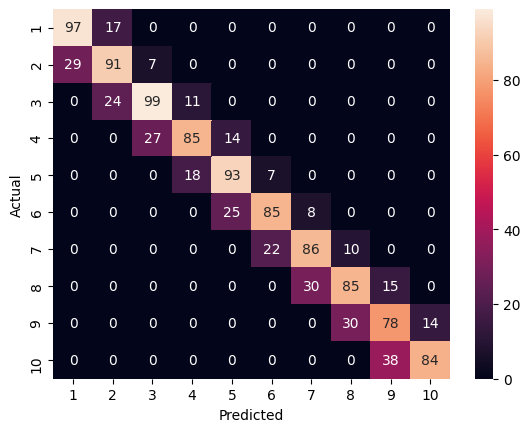

Classification report: 
               precision    recall  f1-score   support

           1       0.77      0.85      0.81       114
           2       0.69      0.72      0.70       127
           3       0.74      0.74      0.74       134
           4       0.75      0.67      0.71       126
           5       0.70      0.79      0.74       118
           6       0.75      0.72      0.73       118
           7       0.69      0.73      0.71       118
           8       0.68      0.65      0.67       130
           9       0.60      0.64      0.62       122
          10       0.86      0.69      0.76       122

    accuracy                           0.72      1229
   macro avg       0.72      0.72      0.72      1229
weighted avg       0.72      0.72      0.72      1229



In [ ]:
confusion_matrix = pd.crosstab(df_res['true_val'], df_res['pred_round'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print('Classification report: \n', metrics.classification_report(df_res['true_val'], df_res['pred_round']))

In [ ]:
#sns.pairplot(df_res,hue="pred", vars=['f1_pred'], kind="kde", height=4, palette="Spectral")
sns.pairplot(df_res,hue="pred_val",vars=['x','y','true_val','pred_round'], kind="scatter", height=4, palette="Spectral")

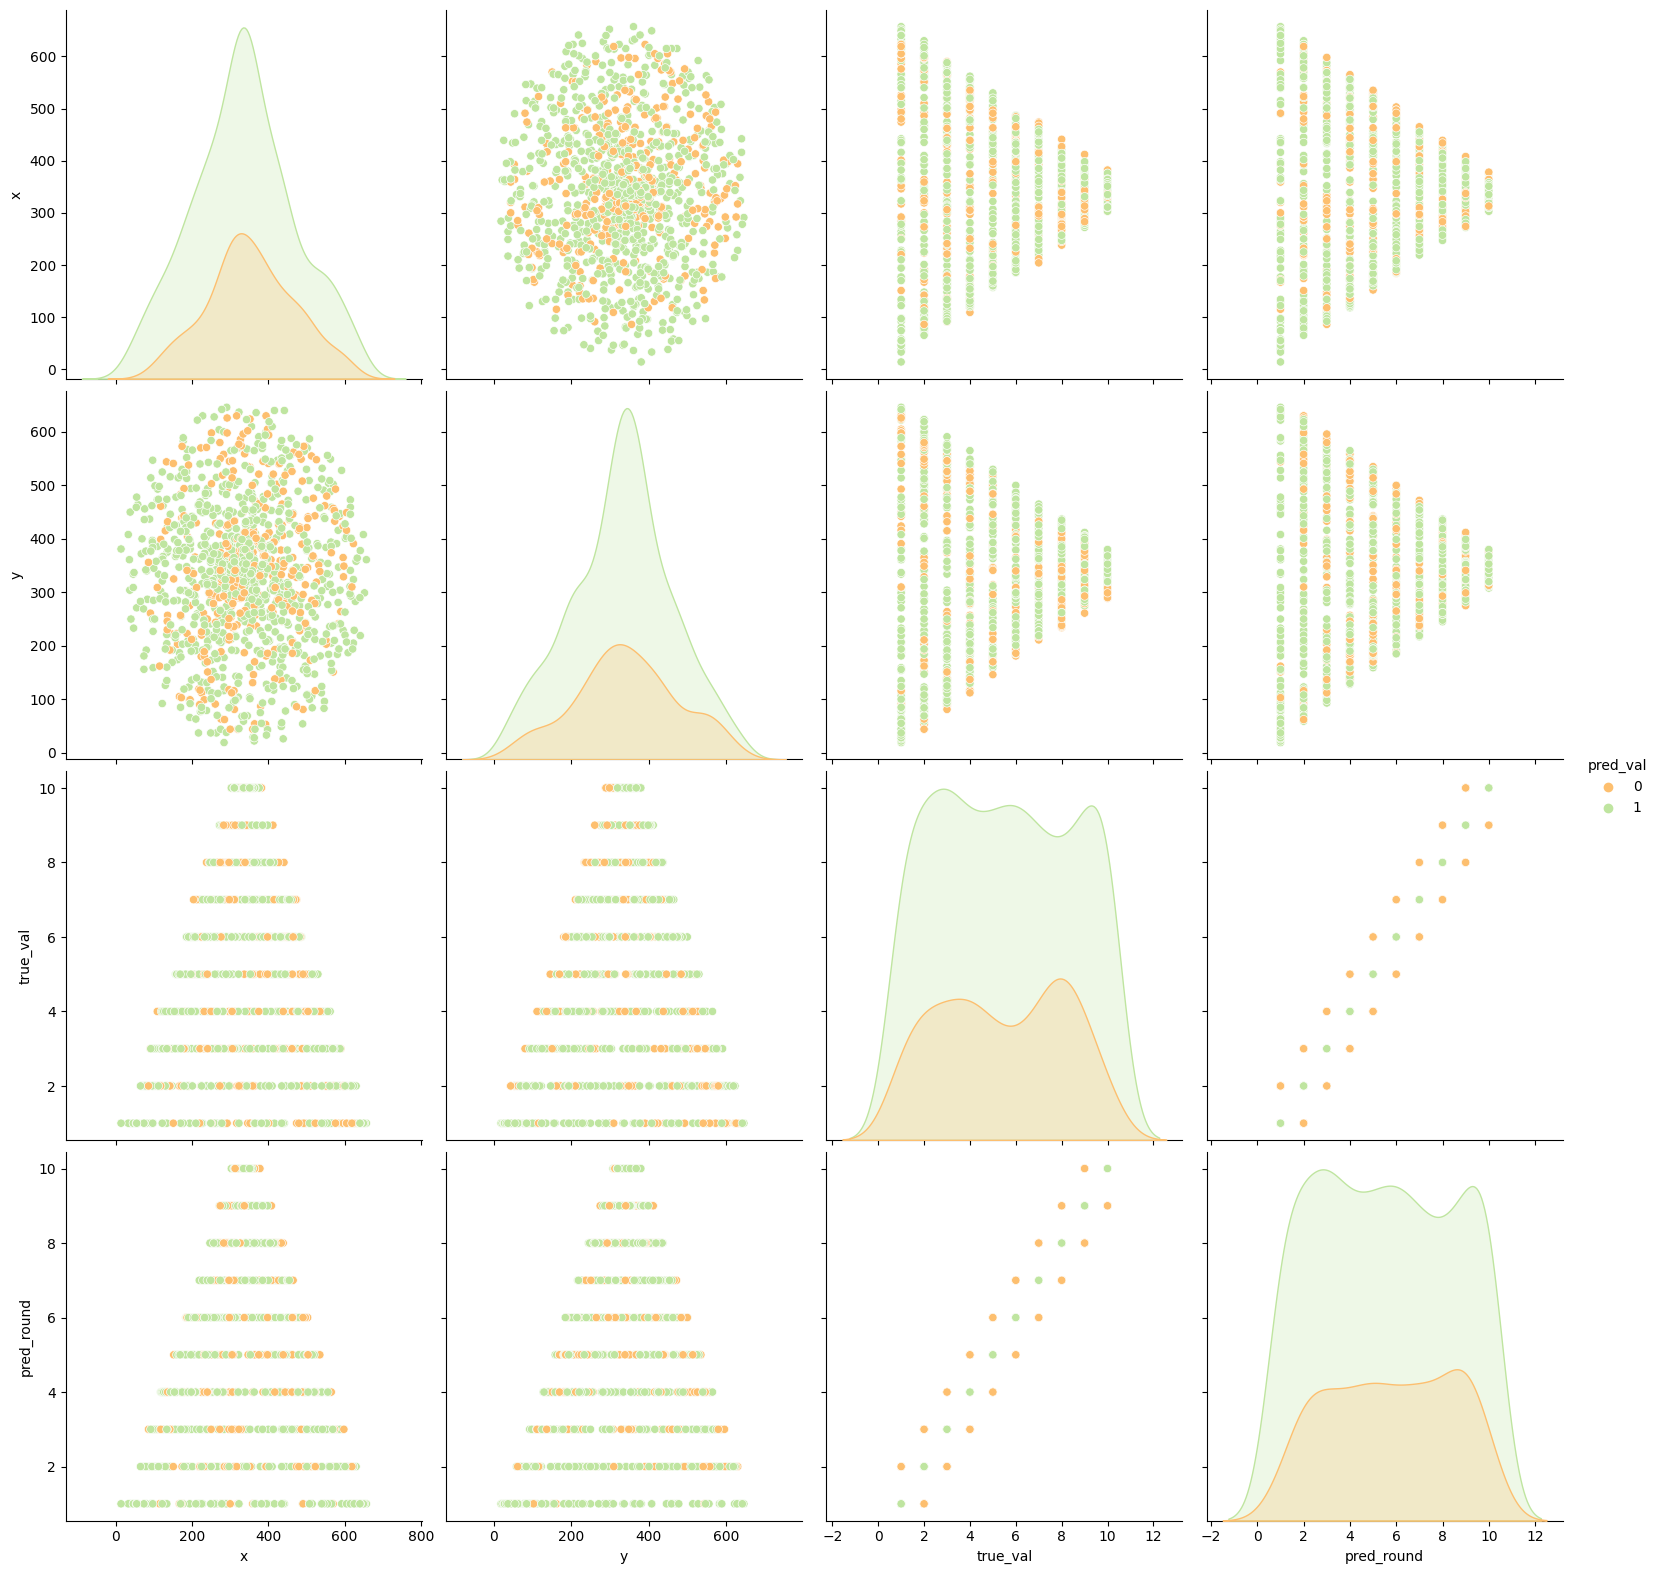

In [ ]:
plt.show()

In [ ]:
model.save('model_obtener_score_3.h5')